

# Project: Investigate a Dataset - TMDB Movie Data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

   ● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.

● There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.

● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.

### Question(s) for Analysis
Which genres are
most popular from
year to year? What
kinds of properties
are associated with
movies that have high
revenues?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

I loaded the data and checked its clearness 



### General Properties
I checked gneral data informations like shape , data types and descriptive statistics

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape


(10866, 21)

Indecates the size of data set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

shows the data type of each coloumn and checks the missing values

In [5]:
sum(df.duplicated())

1

This is a duplicated record stored 

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
sum(df.duplicated())

0

Duplicated record removed

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


It is unlogical that 50% of movies have 0 value of budget

Data set statistics


### Data Cleaning
Fixing proplems founded and prepare data for analysis step
 

remove rows and coulms that have no impact on analysis 

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [11]:
mask=df.query('budget=="0"')
mask

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.000000e+00
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.000000e+00
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.000000e+00


In [12]:
df.drop(mask.index,inplace=True)


In [13]:
df.shape

(5169, 21)

In [14]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5169.000000,5169.000000,5.169000e+03,5.169000e+03,5169.000000,5169.000000,5169.000000,5169.000000,5.169000e+03,5.169000e+03
mean,45513.725479,0.992400,3.073958e+07,8.029101e+07,107.096150,408.651190,6.032308,2001.251112,3.688907e+07,1.021953e+08
std,72730.345078,1.329262,3.890441e+07,1.594865e+08,22.810038,788.314712,0.884125,11.776443,4.196096e+07,1.959194e+08
min,5.000000,0.001117,1.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,0.000000e+00
25%,8840.000000,0.347958,6.000000e+06,0.000000e+00,93.000000,35.000000,5.500000,1996.000000,8.102293e+06,0.000000e+00
50%,13008.000000,0.624024,1.700000e+07,2.100156e+07,103.000000,122.000000,6.100000,2005.000000,2.271505e+07,2.863167e+07
75%,44943.000000,1.152417,4.000000e+07,8.945676e+07,117.000000,402.000000,6.600000,2010.000000,5.008384e+07,1.134196e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


zero budget movies removed

In [15]:
df.dropna(inplace=True)
df.shape


(1446, 21)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 10760
Data columns (total 21 columns):
id                      1446 non-null int64
imdb_id                 1446 non-null object
popularity              1446 non-null float64
budget                  1446 non-null int64
revenue                 1446 non-null int64
original_title          1446 non-null object
cast                    1446 non-null object
homepage                1446 non-null object
director                1446 non-null object
tagline                 1446 non-null object
keywords                1446 non-null object
overview                1446 non-null object
runtime                 1446 non-null int64
genres                  1446 non-null object
production_companies    1446 non-null object
release_date            1446 non-null object
vote_count              1446 non-null int64
vote_average            1446 non-null float64
release_year            1446 non-null int64
budget_adj              1446 non-null flo

In [17]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1446.000000,1446.000000,1.446000e+03,1.446000e+03,1446.000000,1446.000000,1446.000000,1446.000000,1.446000e+03,1.446000e+03
mean,56528.937068,1.645021,4.759480e+07,1.568649e+08,109.512448,855.459889,6.226072,2007.230982,4.997049e+07,1.772762e+08
std,78471.732291,2.092793,5.393600e+07,2.457147e+08,23.842756,1214.378903,0.832741,7.875891,5.422983e+07,2.868967e+08
min,11.000000,0.007487,1.000000e+00,0.000000e+00,0.000000,10.000000,2.200000,1961.000000,9.693980e-01,0.000000e+00
25%,7525.000000,0.568599,1.000000e+07,1.041446e+07,95.000000,125.250000,5.700000,2006.000000,1.107498e+07,1.106079e+07
50%,22822.500000,1.056062,3.000000e+07,6.323638e+07,106.000000,373.500000,6.250000,2009.000000,3.049201e+07,6.713063e+07
75%,68557.750000,1.953823,6.500000e+07,1.875963e+08,119.000000,1059.000000,6.800000,2012.000000,7.089506e+07,2.103242e+08
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


In [18]:
zero_revenue=df.query('revenue=="0"')
zero_revenue

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
159,251516,tt3472226,0.953046,630019,0,Kung Fury,David Sandberg|Jorma Taccone|Leopold Nilsson|A...,http://www.kungfury.com/,David Sandberg,It takes a cop from the future to fight an ene...,...,"During an unfortunate series of events, a frie...",31,Action|Comedy|Science Fiction|Fantasy,Laser Unicorns,5/28/15,487,7.7,2015,5.796172e+05,0.0
239,326215,tt3411432,0.542568,6000000,0,Ooops! Noah is Gone...,Tara Flynn|Alan Stanford|Martin Sheen|Amy Gran...,http://ulyssesfilms.de/films-series.html#Ooops...,Toby Genkel|Sean McCormack,"One ark, 50,000 animals. What could go wrong?",...,It's the end of the world. A flood is coming. ...,85,Animation|Adventure|Comedy,Skyline Entertainment|Moetion Films|Ulysses Fi...,4/9/15,50,5.7,2015,5.519998e+06,0.0
399,354924,tt3952108,0.277035,1000000,0,The Dead Room,Jed Brophy|Jeffrey Thomas|Laura Petersen,http://www.thedeadroommovie.com/,Jason Stutter,There is an intruder. It's you.,...,When a terrified family flees a desolate south...,80,Horror|Thriller,Centron Pictures,10/1/15,16,4.6,2015,9.199996e+05,0.0
406,334531,tt3719896,0.261717,20000000,0,My All American,Aaron Eckhart|Finn Wittrock|Robin Tunney|Sarah...,http://www.myallamerican.com/,Angelo Pizzo,Hope never quits,...,"Freddie Steinmark, an underdog on the gridiron...",118,Drama,Paul Schiff Productions|Anthem Productions,11/13/15,19,6.9,2015,1.839999e+07,0.0
426,298582,tt3977462,0.243321,1500000,0,Full Out,Ana Golja|Jennifer Beals|Ashanti Bromfield|Tre...,https://www.facebook.com/fulloutmovie/,Sean Cisterna,Sometimes You Have to Fall Before You Fly,...,Based on the true life story of California gym...,94,History|Drama|Family,Carmel Creek Productions,9/11/15,15,7.2,2015,1.379999e+06,0.0
427,301228,tt1957938,0.242078,1500000,0,Narcopolis,Elliot Cowan|Elodie Yung|Jonathan Pryce|Robert...,http://junkfilm.com/,Justin Trefgarne,The future is a fix.,...,"In the near future, Frank, a police officer, d...",96,Thriller|Mystery|Science Fiction,T Squared Film,9/25/15,20,4.4,2015,1.379999e+06,0.0
488,75861,tt1850418,0.253949,3400000,0,To Write Love on Her Arms,Kat Dennings|Chad Michael Murray|Rupert Friend...,http://www.reneethemovie.com/,Nathan Frankowski,Based on the True Story that started a Global ...,...,The story follows 19-year-old Renee who has al...,118,Drama|Music,Two Streets Entertainment|Birchwood Pictures|N...,3/13/15,32,6.9,2015,3.127999e+06,0.0
505,329556,tt2186848,0.149640,1000000,0,Landmine Goes Click,Sterling Knight|Spencer Locke|Dean Geyer|Kote ...,https://www.facebook.com/thelandmine,Levan Bakhia,Dare to step off.,...,"After an American tourist steps on a landmine,...",110,Action|Crime|Drama|Thriller,Scatena & Rosner Films|Sarke Studio|Imedi Films,3/3/15,13,5.7,2015,9.199996e+05,0.0
515,395560,tt3108244,0.142759,1300000,0,Capsule,Edmund Kingsley|David Wayman|Nigel Barber|Lisa...,http://capsulethemovie.com/,Andrew Martin,"One Man, One Mission, One Choice",...,Guy is an experienced British fighter pilot wh...,91,Drama|History|Thriller|Science Fiction,Ecaveo Capital Partners|Hermes Space Industries,12/23/15,11,5.3,2015,1.195999e+06,0.0


In [19]:
df.drop(zero_revenue.index,inplace=True)

In [20]:
df.shape

(1287, 21)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 21 columns):
id                      1287 non-null int64
imdb_id                 1287 non-null object
popularity              1287 non-null float64
budget                  1287 non-null int64
revenue                 1287 non-null int64
original_title          1287 non-null object
cast                    1287 non-null object
homepage                1287 non-null object
director                1287 non-null object
tagline                 1287 non-null object
keywords                1287 non-null object
overview                1287 non-null object
runtime                 1287 non-null int64
genres                  1287 non-null object
production_companies    1287 non-null object
release_date            1287 non-null object
vote_count              1287 non-null int64
vote_average            1287 non-null float64
release_year            1287 non-null int64
budget_adj              1287 non-null flo

In [22]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1287.000000,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1.287000e+03
mean,52557.491064,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094,5.462994e+07,1.991775e+08
std,74450.077163,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503,5.525463e+07,2.968515e+08
min,11.000000,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000,9.693980e-01,4.300000e+01
25%,5851.500000,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000,1.519180e+07,2.764890e+07
50%,20178.000000,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000,3.556927e+07,8.674770e+07
75%,62209.500000,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000,7.630125e+07,2.351178e+08
max,333348.000000,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


zero revenue movies removed

In [23]:
df.drop(['homepage','tagline','overview','imdb_id','id','cast','keywords','genres','production_companies','budget_adj','revenue_adj'],axis=1,inplace=True)
df.head()

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,4/1/15,2947,7.3,2015


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 10 columns):
popularity        1287 non-null float64
budget            1287 non-null int64
revenue           1287 non-null int64
original_title    1287 non-null object
director          1287 non-null object
runtime           1287 non-null int64
release_date      1287 non-null object
vote_count        1287 non-null int64
vote_average      1287 non-null float64
release_year      1287 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 110.6+ KB


In [25]:
median = df['revenue'].median()
low_revenue = df.query('revenue < {}'.format(median))
high_revenue = df.query('revenue >= {}'.format(median))

In [27]:
low_revenue

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year
12,6.118847,15000000,36869414,Ex Machina,Alex Garland,108,1/21/15,2854,7.6,2015
35,3.557846,6000000,35401758,Room,Lenny Abrahamson,117,10/16/15,1520,8.0,2015
39,3.227329,11000000,62076141,Brooklyn,John Crowley,111,11/4/15,754,7.3,2015
44,3.025852,25000000,42629776,The Age of Adaline,Lee Toland Krieger,112,4/16/15,1221,7.3,2015
45,3.023253,10000000,14333790,Hardcore Henry,Ilya Naishuller,97,9/12/15,396,5.9,2015
49,2.885126,4000000,9064511,The Lobster,Yorgos Lanthimos,118,10/8/15,638,6.6,2015
50,2.883233,11800000,40272135,Carol,Todd Haynes,118,11/20/15,562,7.1,2015
55,2.584264,20000000,36606743,Burnt,John Wells,100,10/2/15,631,6.3,2015
56,2.578919,26000000,30523226,Self/less,Tarsem Singh,116,7/10/15,719,6.2,2015
57,2.575711,60000000,30418560,Mortdecai,David Koepp,106,1/21/15,696,5.3,2015


<a id='eda'></a>
## Exploratory Data Analysis




## General conclusion

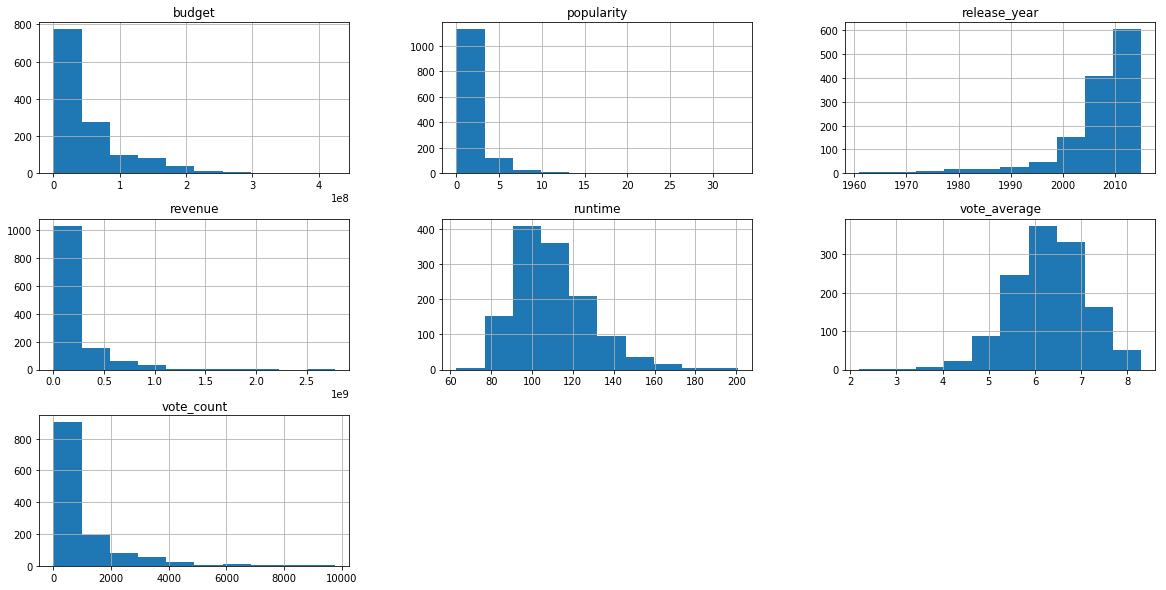

In [26]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(20,10));


most movies have low budget

revenue has a direct relation with budget

number of movies increase every year 

### What kinds of properties are associated with movies that have high revenues?

IS popularity affect on revenu?

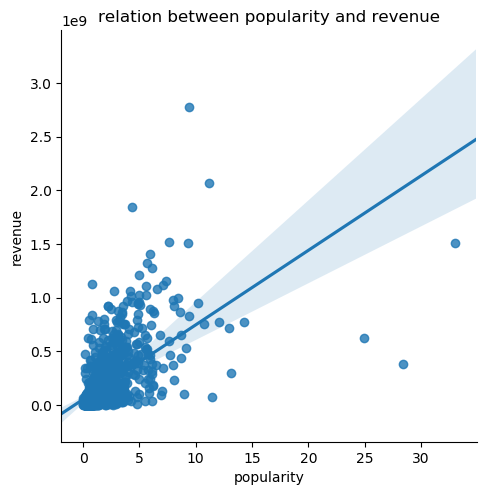

In [27]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='popularity', y='revenue', data=df)
plt.title("relation between popularity and revenue");

Revenue has a direct relation with popularity 

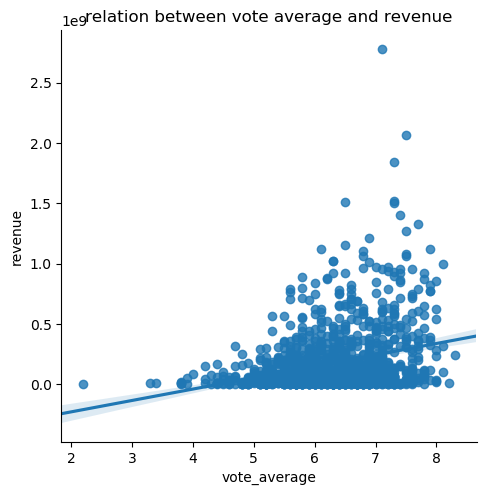

In [30]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='vote_average', y='revenue', data=df)
plt.title('relation between vote average and revenue') ;

# Which genres are most popular from year to year?

Text(0,0.5,'popularity')

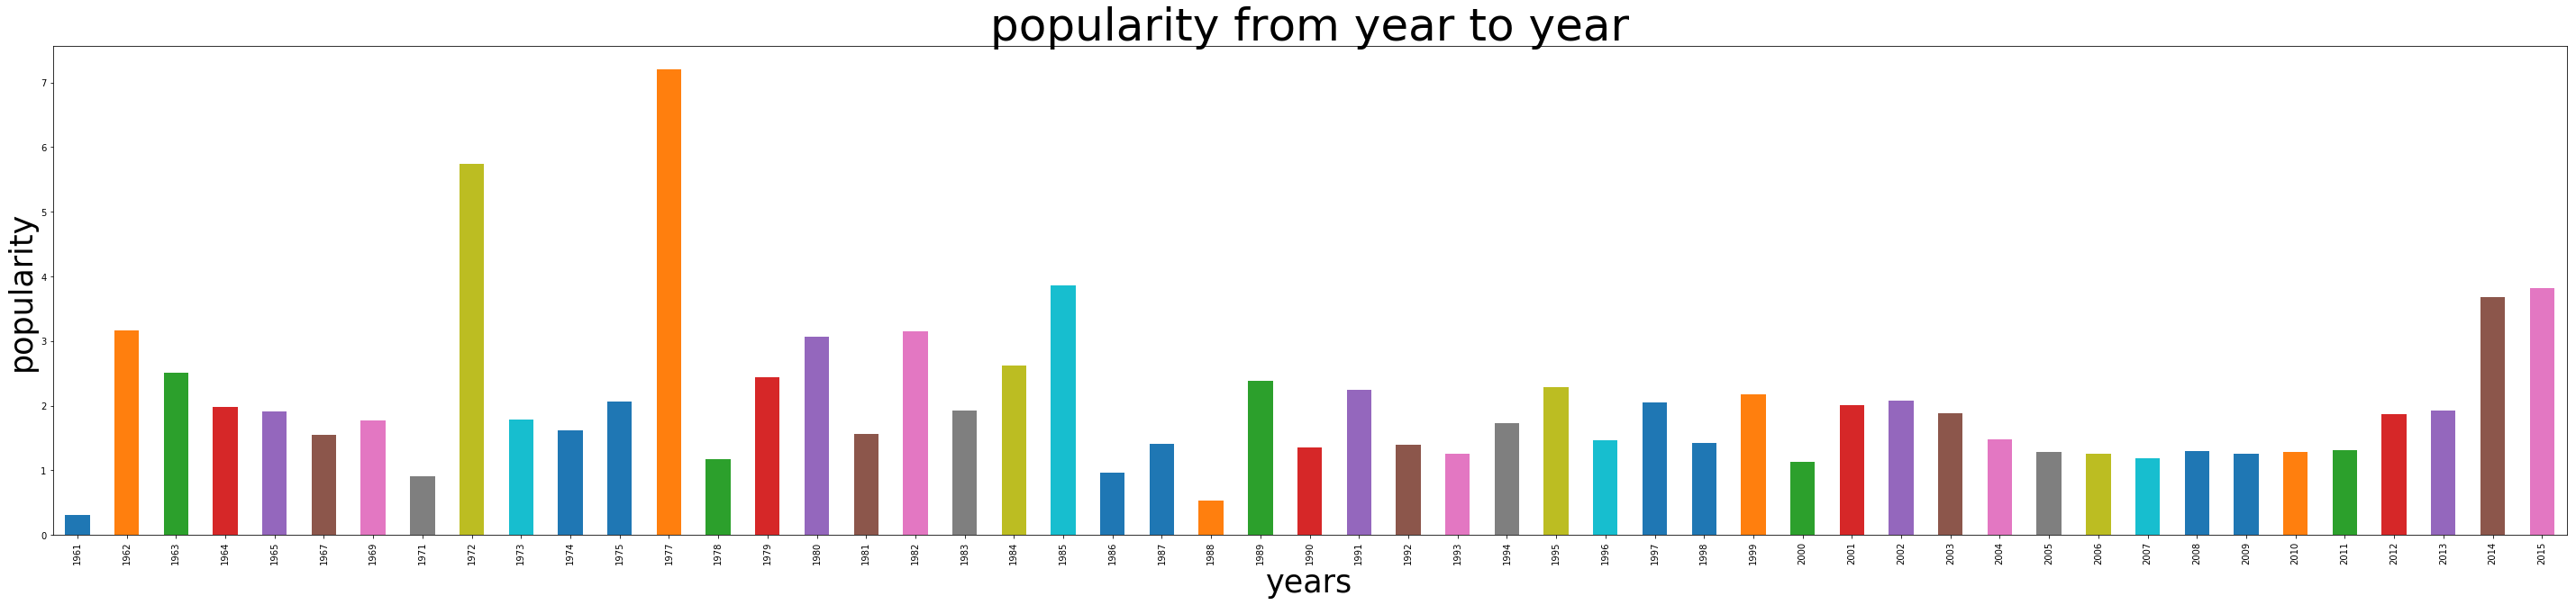

In [29]:
df_genres= df.groupby('release_year')['popularity'].mean()
df_genres.plot.bar(figsize=(50,10))
plt.title('popularity from year to year',fontsize=50)
plt.xlabel('years',fontsize=35)
plt.ylabel('popularity',fontsize=35)

the graph shows that the popularity inceases in last two years (2014,2015)

genres coulmn need to reformated because it contain many data for each row

<a id='conclusions'></a>
## Conclusions

- popularity has a large impact on revenue
- vote average effect on revenue but lower Than popularity 




### Limitations
There are some coulmns contain more Than one item like cast & genres 




In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0